In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   --------------------- ------------------ 8.7/16.4 MB 48.8 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 51.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),
    ('payments.csv', 'payments'), 
    ('geolocation.csv', 'geolocation') # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234567890',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:\\Users\\princ\\Downloads\\porject\\archive'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host="localhost", username= "root", password="1234567890", database = "ecommerce")

cur = db.cursor()



# 1) list all unique cities where customers are located

In [29]:
query = """select distinct customer_city from customers"""
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [33]:
query = """select count(order_id) from orders where year (order_purchase_timestamp)= 2017 """
cur.execute(query)
data = cur.fetchall()
data

"total oders placed in 2017 are ", data[0][0]

('total oders placed in 2017 are ', 45101)

# 3. Find the total sales per category.

In [134]:

query = """
select products.product_category, sum(payments.payment_value)
from products join order_items
on products.product_id= order_items.product_id
join payments on payments.order_id= order_items.order_id
group by products.product_category"""
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns =["category", "sales"])
df

,category,sales
0,perfumery,5.067387e+05
1,Furniture Decoration,1.430176e+06
2,telephony,4.868821e+05
3,bed table bath,1.712554e+06
4,automotive,8.522943e+05
...,...,...
69,cds music dvds,1.199430e+03
70,La Cuisine,2.913530e+03
71,Fashion Children's Clothing,7.856700e+02
72,PC Gamer,2.174430e+03


# 4. Calculate the percentage of orders that were paid in installments.

In [69]:

query = """select sum(case when payment_installments >=1 then 1 else 0 end)/count(*)*100 from payments """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data)
df

,0
0,100.0000


# 5. Count the number of customers from each state. 

<BarContainer object of 27 artists>

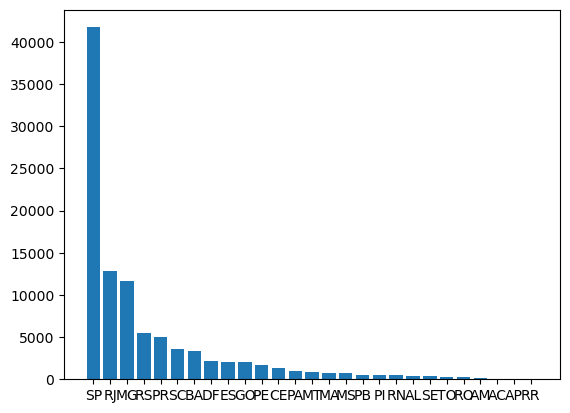

In [88]:
query = """select customer_state, count(customer_id) as ccount
from customers 
group by customer_state
order by ccount desc """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data,columns=['state', 'ccount'])
df

plt.bar(df['state'], df['ccount'])

# 6.Calculate the number of orders per month in 2018.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'July'),
  Text(1, 0, 'August'),
  Text(2, 0, 'February'),
  Text(3, 0, 'June'),
  Text(4, 0, 'March'),
  Text(5, 0, 'January'),
  Text(6, 0, 'May'),
  Text(7, 0, 'April'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October')])

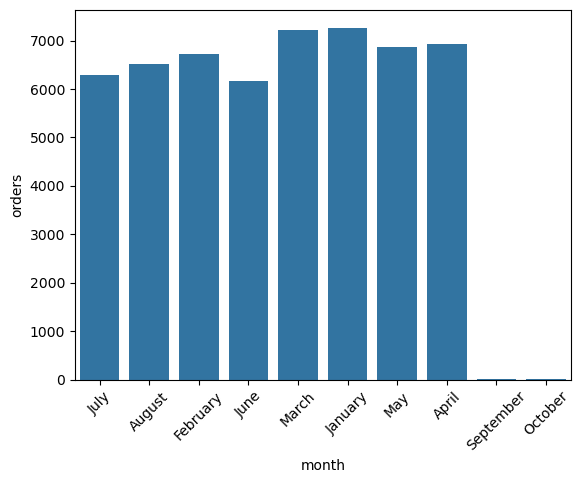

In [125]:
query = """select monthname(order_purchase_timestamp) as pmonth, count(order_id)   from orders
where year(order_purchase_timestamp) =2018
group by pmonth """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=['month', 'orders'] )
df

sns.barplot(x=df['month'], y =df['orders'],data= df)
plt.xticks(rotation =45)

 # 7.Find the average number of products per order, grouped by customer city.

In [130]:
query = """with itemsperorder as (
	SELECT o.customer_id, o.order_id, count(oi.order_id) as orders
	from  order_items oi join orders o on oi.order_id = o.order_id
	join customers c on o.customer_id = c.customer_id
	group by o.customer_id,o.order_id
)
	select customers.customer_city, round(avg(itemsperorder.orders),2)
    from customers join itemsperorder
    on customers.customer_id = itemsperorder.customer_id
    group by customers.customer_city """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=['city', 'avgcountperorder'] )
df

,city,avgcountperorder
0,sao paulo,1.16
1,bage,1.05
2,macapa,1.15
3,sao vendelino,1.00
4,sao caetano do sul,1.11
...,...,...
4105,aurora do para,1.00
4106,nova america,1.00
4107,tibau do sul,1.00
4108,lagoa da canoa,1.00


# 8.Calculate the percentage of total revenue contributed by each product category.

In [138]:
query = """select products.product_category, round((sum(payments.payment_value)/(select round(sum(payments.payment_value),2) from payments))*100,2)
from products join order_items
on products.product_id= order_items.product_id
join payments on payments.order_id= order_items.order_id
group by products.product_category """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=['category', 'percentage distribution'] )
df

,category,percentage distribution
0,perfumery,3.17
1,Furniture Decoration,8.93
2,telephony,3.04
3,bed table bath,10.70
4,automotive,5.32
...,...,...
69,cds music dvds,0.01
70,La Cuisine,0.02
71,Fashion Children's Clothing,0.00
72,PC Gamer,0.01


# 9.Identify the correlation between product price and the number of times a product has been purchased.

In [155]:
import numpy as np
query = """select products.product_category, count(products.product_id) as pcount, round(avg(payments.payment_value),2) as price
from products join order_items
on products.product_id= order_items.product_id
join payments on payments.order_id= order_items.order_id
group by products.product_category
order by pcount desc """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=['category', 'pcount','price'] )

arr1= df['pcount']
arr2= df['price']

a=np.corrcoef([arr1,arr2])
 
print("the correlation between price and number of times a product is purchased ",a[0][1])

the correlation between price and number of times a product is purchased  -0.11254532342597796


# 10.Calculate the total revenue generated by each seller, and rank them by revenue.


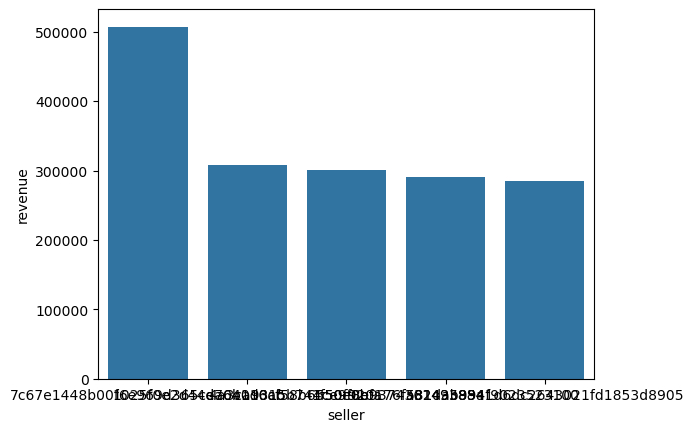

In [170]:

query = """select sellers.seller_id, sum(payment_value) as revenue, rank()over(order by sum(payment_value) desc) as rn
 from sellers join order_items on sellers.seller_id = order_items.seller_id
 join payments on order_items.order_id= payments.order_id
 group by sellers.seller_id """
cur.execute(query)
data = cur.fetchall()
data
df = pd.DataFrame(data, columns=['seller', 'revenue','rank'] )
df =df.head()

sns.barplot(x= "seller", y= "revenue", data = df)
plt.show()

# Advanched queries

# 11.Calculate the moving average of order values for each customer over their order history.